In [282]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
from pandasql import sqldf

pd.set_option('display.max_columns', None)

#### Explore and Clean Response Variable

Notes: Removed schools with missing graduation rates and graduation rates lower then 5% or very low undergraduate fall enrollment. After removing these schools, the response variable has a nice normal distribution.

Questions: Should I use 12-month enrollment instead?

In [283]:
graduation_rates = pd.read_csv('/Users/stefaniecolino/Desktop/CS5100/cs5100_project/data/c5100_project.csv')
fall_enrollment = pd.read_csv('/Users/stefaniecolino/Desktop/CS5100/cs5100_project/data/fall_enrollment.csv')

In [284]:
# Clean Fall Enrollment Data
fall_enrollment = fall_enrollment.pivot_table(index='UNITID', columns='EFLEVEL', values='EFFT', aggfunc='sum')
fall_enrollment.reset_index(inplace=True)
fall_enrollment.columns.name = None
fall_enrollment.rename(columns={30:'ALLUND', 31:'FRESHCLS'}, inplace=True)

In [285]:
# Join Enrollment Counts with GR
graduation_rates = pd.merge(graduation_rates,fall_enrollment, how = 'inner', on = 'UNITID')

In [286]:
graduation_rates.head()

,UNITID,INSTNM,STABBR,ZIP,LOCALE,OBEREG,GBA6RTT,GBA6RTM,GBA6RTW,ALLUND,FRESHCLS
0,100654,Alabama A & M University,AL,35762,12,5,28.0,23.0,32.0,4211.0,1410.0
1,100663,University of Alabama at Birmingham,AL,35294-0110,12,5,62.0,58.0,65.0,8941.0,1948.0
2,100690,Amridge University,AL,36117-3553,12,5,67.0,67.0,67.0,135.0,3.0
3,100706,University of Alabama in Huntsville,AL,35899,12,5,61.0,56.0,68.0,5238.0,1203.0
4,100724,Alabama State University,AL,36104-0271,12,5,28.0,23.0,32.0,4362.0,1143.0


(array([ 71.,  27.,  39.,  47.,  59.,  72., 109., 109., 138., 141., 187.,
        196., 165., 153., 152.,  78.,  74.,  55.,  50.,  49.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <BarContainer object of 20 artists>)

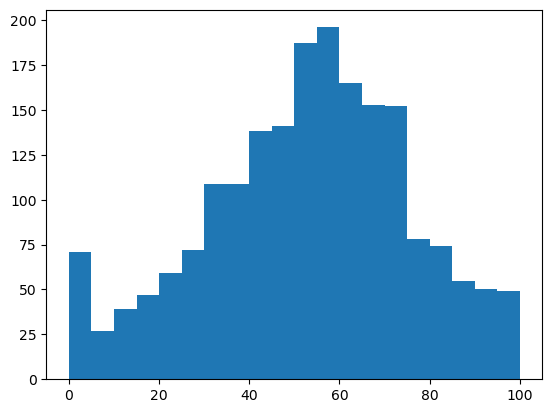

In [287]:
plt.hist(graduation_rates["GBA6RTT"], bins=20)

Histogram shows a normal distribution with some graduation rates as 0 and 100. The 0 graduation rates will get filtered out.

In [288]:
graduation_rates.describe()

,UNITID,LOCALE,OBEREG,GBA6RTT,GBA6RTM,GBA6RTW,ALLUND,FRESHCLS
count,2228.000000,2228.000000,2228.000000,1971.000000,1896.000000,1864.000000,2228.000000,2217.000000
mean,218063.457810,19.734740,4.461400,52.411974,48.629219,56.602468,3625.716786,788.376184
std,99654.748497,9.628768,2.240149,22.909882,23.505216,22.875453,6088.978941,1195.431945
min,100654.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,155314.750000,12.000000,3.000000,38.000000,33.000000,43.750000,559.250000,123.000000
50%,196092.500000,13.000000,5.000000,54.000000,50.000000,59.000000,1504.000000,364.000000
75%,229461.250000,23.000000,6.000000,68.000000,65.000000,72.000000,3821.750000,880.000000
max,489937.000000,43.000000,9.000000,100.000000,100.000000,100.000000,100011.000000,8955.000000


Remove school with <= 75 undergrad students and school with no graduation rates

In [289]:
graduation_rates = graduation_rates[(graduation_rates['ALLUND'] > 75) & (graduation_rates['GBA6RTT'].notna()) & (graduation_rates['GBA6RTT'] > 5)] 

(array([ 27.,  35.,  48.,  46.,  68., 105.,  83., 128., 135., 142., 188.,
        180., 148., 110., 137.,  63.,  62.,  49.,  47.,  30.]),
 array([  6. ,  10.7,  15.4,  20.1,  24.8,  29.5,  34.2,  38.9,  43.6,
         48.3,  53. ,  57.7,  62.4,  67.1,  71.8,  76.5,  81.2,  85.9,
         90.6,  95.3, 100. ]),
 <BarContainer object of 20 artists>)

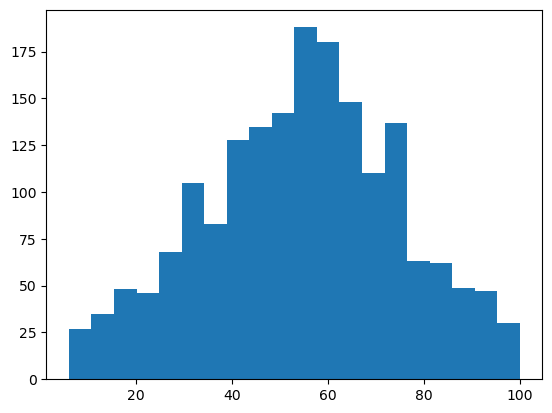

In [290]:
plt.hist(graduation_rates["GBA6RTT"], bins=20)

In [291]:
graduation_rates.drop(columns={'FRESHCLS'}, inplace=True)

In [292]:
graduation_rates.shape

(1831, 10)

### Clean and Explore Predictive Features

In [293]:
main_data = pd.read_csv('/Users/stefaniecolino/Desktop/CS5100/cs5100_project/data/main_data.csv')

In [294]:
main_data.head()

,UNITID,OPEFLAG,SECTOR,DEGGRANT,HBCU,HOSPITAL,CARNEGIE,PSET4FLG,PEO1ISTR,PEO2ISTR,PEO3ISTR,PEO4ISTR,RELAFFIL,LEVEL7,LEVEL8,LEVEL17,LEVEL18,LEVEL19,OPENADMP,CREDITS1,CREDITS2,CREDITS3,CREDITS4,SLO5,SLO6,STUSRV1,STUSRV2,STUSRV3,STUSRV4,STUSRV8,ATHASSOC,SPORT1,CONFNO1,SPORT2,CONFNO2,SPORT3,CONFNO3,SPORT4,CONFNO4,APPLFEEU,ROOM,ROOMCAP,BOARD,RMBRDAMT,ALLONCAM,TUITPL,TUITPL1,TUITPL2,TUITPL3,TUITPL4,DISTCRS,LIBRES1,LIBRES2,LIBRES3,LIBRES4,LIBRES5,LIBRES6,LIBRES9,DISAB,TUITION1,FEE1,HRCHG1,TUITION2,FEE2,HRCHG2,TUITION3,FEE3,HRCHG3,chg2ay2,chg2at2,chg2af2,chg2ay3,chg2at3,chg2af3,chg3ay2,chg3at2,chg3af2,chg3ay3,chg3at3,chg3af3,RMINSTTP,RMOUSTTP,RMFRGNCP,DVEF13,DVEF14,DVEF15,ENRTOT,EFUG,EFUG1ST,EFUGTRN,EFUGCNT,PCUENRAN,PCUENRAP,PCUENRBK,PCUENRHS,PCUENRWH,PCUENR2M,PCUENRUN,PCUENRNR,PCUENRW,EFUGFT,EFUGPT,PCUENRNH,PCUENRAS,PCUDEEXC,PCUDESOM,PCUDENON,LPBOOKSP,LPMEDIAP,LEBOOKSP,LEDATABP,LEMEDIAP,LSALWAGP,LFRNGBNP,LEXMSBBP,LEXMSCSP,LEXMSOTP,LEXOMTLP,LEXPTOTF,LPSERIAP,LESERIAP,F1CORREV,F3GVGCPC,F1TUFEPC,F1STAPPC,F1LCAPPC,F1GVGCPC,F1PGGCPC,F1INVRPC,F1OTRVPC,F1COREXP,F1INSTPC,F1RSRCPC,F1PBSVPC,F1ACSPPC,F1STSVPC,F1INSUPC,F1OTEXPC,F1SAFBPC,F1EQUITR,F1ENDMFT,F2CORREV,F2TUFEPC,F2GVGCPC,F2PGGCPC,F2INVRPC,F2OTRVPC,F2COREXP,F2INSTPC,F2RSRCPC,F2PBSVPC,F2ACSPPC,F2STSVPC,F2INSUPC,F2OTEXPC,Expr1155,F2ENDMFT,F2EQUITR,F2SAFBPC,F3CORREV,F3TUFEPC,F3SSEAPC,F3OTRVPC,F3TUFEFT,F3SSEAFT,F3OTRVFT,F3COREXP,F3INSTPC,F3OTEXPC,F3EQUITR,F3PGGCPC,F3INVRPC,F3RSRCPC,F3PBSVPC,F3ACSPPC,F3STSVPC,F3INSUPC,F3SAFBPC,F3SWINSP,F3SWRSRP,F3SWPBSP,F3SWACSP,F3SWSTSP,F3SWISPP,F3SWOTEP,F3SWCREP,F1SWCREP,F1SWINSP,F1SWRSRP,F1SWPBSP,F1SWACSP,F1SWSTSP,F1SWISPP,F1SWOTEP,F2SWCREP,F2SWINSP,F2SWRSRP,F2SWPBSP,F2SWACSP,F2SWSTSP,F2SWISPP,F2SWOTEP,SALTOTL,SalProf,SalAssc,SalAsst,SalInst,Sallect,SALNRNK,SFTETOTL,SFTEPSTC,SFTELCAI,CINSON,COTSON,CINSOFF,COTSOFF,TUFEYR2,TUFEYR3,PRCH_EF,IDX_EF,PRCH_F,IDX_F,PRCH_SFA,IDX_SFA
0,100654,1,1,1,1,2,16,1,0,1,0,0,-2,1,1,1,0,0,2,1,0,1,0,1,1,1,1,1,1,1,1,1,133,1,133,1,133,1,200,30.0,1,2323.0,1,NaN,2,1,0,0,1,0,1,1,1,1,1,1,1,0,1,8130.0,1236,271.0,8130.0,1236,271.0,16260.0,1236,542.0,9366.0,7770.0,1596.0,9366,8130.0,1236,17136.0,15540.0,1596.0,17496,16260.0,1236,61.0,38.0,0.0,NaN,NaN,NaN,5859,4851,1448,210,2958,0,0,91,1,2,4,0,1,57,4436,415,0,0,1,17,82,49,1,0,0,7,33.0,12.0,3.0,37.0,11.0,4.0,590.0,0,43,1.363301e+08,NaN,34.0,30.0,0.0,30.0,2.0,0.0,4.0,1.328153e+08,21.0,5.0,10.0,4.0,12.0,17.0,30.0,49.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0,73.0,46.0,55.0,49.0,44.0,50.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63193.0,86750.0,70031.0,57676.0,44281.0,NaN,39350.0,846,292,21,22886.0,31016.0,22886.0,31016.0,9366.0,9366,-2,-2,-2,-2,-2,-2
1,100663,1,1,1,2,1,15,1,0,1,1,0,-2,1,1,1,1,1,2,1,1,1,0,1,1,1,1,1,1,0,1,1,111,1,111,1,111,1,111,30.0,1,2785.0,1,NaN,2,1,0,0,1,0,1,1,1,1,1,1,1,0,1,8040.0,0,316.0,8040.0,0,316.0,18368.0,0,746.0,7766.0,7766.0,0.0,8040,8040.0,0,17654.0,17654.0,0.0,18368,18368.0,0,85.0,13.0,2.0,NaN,NaN,NaN,19535,12369,2021,1598,8428,0,6,26,3,58,4,1,2,59,8971,3398,0,6,14,41,45,56,12,6,0,12,36.0,11.0,2.0,44.0,0.0,7.0,630.0,11,2,1.214467e+09,NaN,15.0,22.0,0.0,32.0,8.0,10.0,14.0,1.103351e+09,26.0,24.0,14.0,16.0,4.0,13.0,2.0,53.0,41.0,26979.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0,62.0,43.0,45.0,60.0,40.0,38.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93743.0,133173.0,91643.0,74336.0,65382.0,NaN,NaN,8459,2350,182,25808.0,36136.0,25808.0,36136.0,7766.0,8040,-2,-2,-2,-2,-2,-2
2,100690,1,2,1,2,2,51,1,0,1,0,0,74,1,0,1,0,0,1,0,1,1,0,0,0,0,1,1,0,0,2,2,-2,2,-2,2,-2,2,-2,50.0,2,NaN,3,NaN,2,1,1,0,0,0,1,1,1,1,1,1,1,0,1,9000.0,1180,430.0,9000.0,1180,430.0,9000.0,1180,430.0,7180.0,6000.0,1180.0,7180,6000.0,1180,7180.0,6000.0,1180.0,7180,6000.0,1180,83.0,17.0,0.0,0.0,16.0,83.0,597,294,23,43,227,0,0,23,1

In [295]:
# Join with filtered response data
final_data = pd.merge(graduation_rates, main_data, how='inner', on='UNITID')

In [296]:
# Update title IV flag to binary
final_data['titleIV'] = final_data['OPEFLAG'].apply(lambda x: 1 if x in [1, 2, 4, 5] else 0)

In [297]:
print(final_data['SECTOR'].value_counts())

# Drop school coded as 6
final_data=final_data[final_data['SECTOR']!= 6]

SECTOR
2    1095
1     584
3     129
6       1
Name: count, dtype: int64


In [298]:
# One hot encoding for sector
one_hot_encoded = pd.get_dummies(final_data['SECTOR'], dtype=int)
one_hot_encoded.rename(columns={1:"SECTOR_ADMINUNIT", 2:"SECTOR_PUBLIC", 3:"SECTOR_PRIVATE"}, inplace=True)
final_data = pd.concat([final_data, one_hot_encoded], axis=1)

In [299]:
final_data['HBCU'].value_counts()

HBCU
2    1724
1      84
Name: count, dtype: int64

In [300]:
# Update HBCU to be 1/0
final_data['HBCU'] = final_data['HBCU'].apply(lambda x: 1 if x == 1 else 0)

In [301]:
final_data['HOSPITAL'].value_counts()

HOSPITAL
 2    1737
 1      46
-2      25
Name: count, dtype: int64

In [302]:
# Update HBCU to be 1/0
final_data['HOSPITAL'] = final_data['HOSPITAL'].apply(lambda x: 1 if x == 1 else 0)

In [303]:
print(final_data['CARNEGIE'].value_counts())
final_data['CARNEGIE'] = final_data['CARNEGIE'].apply(lambda x: 15 if x == 16 else x)
final_data['CARNEGIE'] = final_data['CARNEGIE'].apply(lambda x: 21 if x == 22 else x)
final_data['CARNEGIE'] = final_data['CARNEGIE'].apply(lambda x: 32 if x == 33 else x)
final_data['CARNEGIE'] = final_data['CARNEGIE'].apply(lambda x: 59 if x in [60, 58, 52, 53, 55, 54, 56, 51] else x)
final_data['CARNEGIE'] = final_data['CARNEGIE'].apply(lambda x: -3 if x == 40 else x)



CARNEGIE
 21    464
 32    283
 31    210
-3     171
 15    147
 40    102
 16     99
 22     95
 51     82
 56     50
 33     33
 54     18
 55     17
 53     15
 59     12
 60      6
 58      3
 52      1
Name: count, dtype: int64


In [304]:
print(final_data['CARNEGIE'].value_counts())

CARNEGIE
 21    559
 32    316
-3     273
 15    246
 31    210
 59    204
Name: count, dtype: int64


In [305]:
# One hot encoding for carnegie

one_hot_encoded = pd.get_dummies(final_data['CARNEGIE'], dtype=int)
one_hot_encoded.rename(columns={21:"CARNEGIE_MASTERS", 31:"CARNEGIE_BACHLIBARTS", 32:"CARNEGIE_BACHGEN", 15: "CARNEGIE_RESEARCH", -3: "CARNEGIE_UNKNOWN", 59:"CARNEGIE_SPECIALTY"}, inplace=True)
final_data = pd.concat([final_data, one_hot_encoded], axis=1)

In [306]:
final_data['RELAFFIL'] = final_data['RELAFFIL'].apply(lambda x: 0 if x == -2 else 1)

In [307]:
final_data['OPENADMP'] = final_data['OPENADMP'].apply(lambda x: 1 if x == 1 else 0)
final_data['CREDITS1'] = final_data['CREDITS1'].apply(lambda x: 1 if x == 1 else 0)
final_data['CREDITS2'] = final_data['CREDITS2'].apply(lambda x: 1 if x == 1 else 0)
final_data['CREDITS3'] = final_data['CREDITS3'].apply(lambda x: 1 if x == 1 else 0)
final_data['CREDITS4'] = final_data['CREDITS4'].apply(lambda x: 1 if x == 1 else 0)
final_data['LEVEL7'] = final_data['LEVEL7'].apply(lambda x: 1 if x == 1 else 0)
final_data['LEVEL8'] = final_data['LEVEL8'].apply(lambda x: 1 if x == 1 else 0)
final_data['LEVEL17'] = final_data['LEVEL17'].apply(lambda x: 1 if x == 1 else 0)
final_data['LEVEL18'] = final_data['LEVEL18'].apply(lambda x: 1 if x == 1 else 0)
final_data['LEVEL19'] = final_data['LEVEL19'].apply(lambda x: 1 if x == 1 else 0)

final_data['SLO5'] = final_data['SLO5'].apply(lambda x: 1 if x == 1 else 0)
final_data['SLO6'] = final_data['SLO6'].apply(lambda x: 1 if x == 1 else 0)
final_data['STUSRV1'] = final_data['STUSRV1'].apply(lambda x: 1 if x == 1 else 0)
final_data['STUSRV2'] = final_data['STUSRV2'].apply(lambda x: 1 if x == 1 else 0)
final_data['STUSRV3'] = final_data['STUSRV3'].apply(lambda x: 1 if x == 1 else 0)
final_data['STUSRV4'] = final_data['STUSRV4'].apply(lambda x: 1 if x == 1 else 0)
final_data['STUSRV8'] = final_data['STUSRV8'].apply(lambda x: 1 if x == 1 else 0)

final_data['ATHASSOC'] = final_data['ATHASSOC'].apply(lambda x: 1 if x == 1 else 0)
final_data['SPORT1'] = final_data['SPORT1'].apply(lambda x: 1 if x == 1 else 0)
final_data['SPORT2'] = final_data['SPORT2'].apply(lambda x: 1 if x == 1 else 0)
final_data['SPORT3'] = final_data['SPORT3'].apply(lambda x: 1 if x == 1 else 0)
final_data['SPORT4'] = final_data['SPORT4'].apply(lambda x: 1 if x == 1 else 0)

final_data['ROOM'] = final_data['ROOM'].apply(lambda x: 1 if x == 1 else 0)
final_data['BOARD'] = final_data['BOARD'].apply(lambda x: 1 if x in [1, 2] else 0)

final_data['ALLONCAM'] = final_data['ALLONCAM'].apply(lambda x: 1 if  x == 1 else 0)
final_data['TUITPL'] = final_data['TUITPL'].apply(lambda x: 1 if  x == 1 else 0)

final_data['DISTCRS'] = final_data['DISTCRS'].apply(lambda x: 1 if  x == 1 else 0)
final_data['LIBRES1'] = final_data['LIBRES1'].apply(lambda x: 1 if  x == 1 else 0)
final_data['LIBRES2'] = final_data['LIBRES2'].apply(lambda x: 1 if  x == 1 else 0)
final_data['LIBRES3'] = final_data['LIBRES3'].apply(lambda x: 1 if  x == 1 else 0)
final_data['LIBRES4'] = final_data['LIBRES4'].apply(lambda x: 1 if  x == 1 else 0)
final_data['LIBRES5'] = final_data['LIBRES5'].apply(lambda x: 1 if  x == 1 else 0)
final_data['LIBRES6'] = final_data['LIBRES6'].apply(lambda x: 1 if  x == 1 else 0)

# MORE THEN 3% OF STUDENTS WITH DISABILITIES 
final_data['DISAB'] = final_data['DISAB'].apply(lambda x: 1 if  x == 2 else 0)


In [308]:
# Make all the core revenue variables one variable
query = """
SELECT COALESCE(F1CORREV, F2CORREV, F3CORREV) AS CORE_REVENUES
FROM final_data
"""
result = sqldf(query, globals())

final_data = pd.concat([final_data, result], axis=1)

In [309]:
# Make all the percent tuition variables one variable
query = """
SELECT COALESCE(F1TUFEPC, F2TUFEPC, F3TUFEPC) AS PCTUITION
FROM final_data
"""
result = sqldf(query, globals())

final_data = pd.concat([final_data, result], axis=1)

In [310]:
# Make all gov grants variables one variable
query = """
SELECT COALESCE(F1GVGCPC, F2GVGCPC, F3GVGCPC) AS PCGOVGRNT
FROM final_data
"""
result = sqldf(query, globals())

final_data = pd.concat([final_data, result], axis=1)

In [311]:
# Make all private grants variables one variable
query = """
SELECT COALESCE(F1PGGCPC, F2PGGCPC, F3PGGCPC) AS PCPRVTGRNT
FROM final_data
"""
result = sqldf(query, globals())

final_data = pd.concat([final_data, result], axis=1)

In [312]:
# Make all investments variables one variable
query = """
SELECT COALESCE(F1INVRPC, F2INVRPC, F3INVRPC) AS PCINVRV
FROM final_data
"""
result = sqldf(query, globals())

final_data = pd.concat([final_data, result], axis=1)

In [313]:
# Make all other revenue variables one variable
query = """
SELECT COALESCE(F1OTRVPC, F2OTRVPC, F3OTRVPC) AS PCOTHERREV
FROM final_data
"""
result = sqldf(query, globals())

final_data = pd.concat([final_data, result], axis=1)

In [314]:
# Make all core expense variables one variable
query = """
SELECT COALESCE(F1COREXP, F2COREXP, F3COREXP) AS COREEXPENSE
FROM final_data
"""
result = sqldf(query, globals())

final_data = pd.concat([final_data, result], axis=1)

In [315]:
# Make all instructional expense variables one variable
query = """
SELECT COALESCE(F1INSTPC, F2INSTPC, F3INSTPC) AS PCINSTRCT
FROM final_data
"""
result = sqldf(query, globals())

final_data = pd.concat([final_data, result], axis=1)

In [316]:
# Make all research expense variables one variable
query = """
SELECT COALESCE(F1RSRCPC, F2RSRCPC, F3RSRCPC) AS PCRESEARCH
FROM final_data
"""
result = sqldf(query, globals())

final_data = pd.concat([final_data, result], axis=1)

In [317]:
# Make all public service expense variables one variable
query = """
SELECT COALESCE(F1PBSVPC, F2PBSVPC, F3PBSVPC) AS PCPUBSERV
FROM final_data
"""
result = sqldf(query, globals())

final_data = pd.concat([final_data, result], axis=1)

In [318]:
# Make all academic support expense variables one variable
query = """
SELECT COALESCE(F1ACSPPC, F2ACSPPC, F3ACSPPC) AS PCACSUPPORT
FROM final_data
"""
result = sqldf(query, globals())

final_data = pd.concat([final_data, result], axis=1)

In [319]:
# Make all student service expense variables one variable
query = """
SELECT COALESCE(F1STSVPC, F2STSVPC, F3STSVPC) AS PCSTDNTSUPPORT
FROM final_data
"""
result = sqldf(query, globals())

final_data = pd.concat([final_data, result], axis=1)

In [320]:
# Make all institutional support expense variables one variable
query = """
SELECT COALESCE(F1INSUPC, F2INSUPC, F3INSUPC) AS PCINSTSUPPORT
FROM final_data
"""
result = sqldf(query, globals())

final_data = pd.concat([final_data, result], axis=1)

In [321]:
# Make all other expense variables one variable
query = """
SELECT COALESCE(F1OTEXPC, F2OTEXPC, F3OTEXPC) AS PCOTHEREXP
FROM final_data
"""
result = sqldf(query, globals())

final_data = pd.concat([final_data, result], axis=1)

In [322]:
# Make all salaries variables one variable
query = """
SELECT COALESCE(F1SAFBPC, F2SAFBPC, F3SAFBPC) AS PCSALARY
FROM final_data
"""
result = sqldf(query, globals())

final_data = pd.concat([final_data, result], axis=1)

In [323]:
# Make all equity ratio variables one variable
query = """
SELECT COALESCE(F1EQUITR, F2EQUITR, F3EQUITR) AS EQTYRATIO
FROM final_data
"""
result = sqldf(query, globals())

final_data = pd.concat([final_data, result], axis=1)

In [324]:
# Make all Endowment variables one variable
query = """
SELECT COALESCE(F1ENDMFT, F2ENDMFT) AS ENDOWTTL
FROM final_data
"""
result = sqldf(query, globals())

final_data = pd.concat([final_data, result], axis=1)

In [325]:
main_data.head()

,UNITID,OPEFLAG,SECTOR,DEGGRANT,HBCU,HOSPITAL,CARNEGIE,PSET4FLG,PEO1ISTR,PEO2ISTR,PEO3ISTR,PEO4ISTR,RELAFFIL,LEVEL7,LEVEL8,LEVEL17,LEVEL18,LEVEL19,OPENADMP,CREDITS1,CREDITS2,CREDITS3,CREDITS4,SLO5,SLO6,STUSRV1,STUSRV2,STUSRV3,STUSRV4,STUSRV8,ATHASSOC,SPORT1,CONFNO1,SPORT2,CONFNO2,SPORT3,CONFNO3,SPORT4,CONFNO4,APPLFEEU,ROOM,ROOMCAP,BOARD,RMBRDAMT,ALLONCAM,TUITPL,TUITPL1,TUITPL2,TUITPL3,TUITPL4,DISTCRS,LIBRES1,LIBRES2,LIBRES3,LIBRES4,LIBRES5,LIBRES6,LIBRES9,DISAB,TUITION1,FEE1,HRCHG1,TUITION2,FEE2,HRCHG2,TUITION3,FEE3,HRCHG3,chg2ay2,chg2at2,chg2af2,chg2ay3,chg2at3,chg2af3,chg3ay2,chg3at2,chg3af2,chg3ay3,chg3at3,chg3af3,RMINSTTP,RMOUSTTP,RMFRGNCP,DVEF13,DVEF14,DVEF15,ENRTOT,EFUG,EFUG1ST,EFUGTRN,EFUGCNT,PCUENRAN,PCUENRAP,PCUENRBK,PCUENRHS,PCUENRWH,PCUENR2M,PCUENRUN,PCUENRNR,PCUENRW,EFUGFT,EFUGPT,PCUENRNH,PCUENRAS,PCUDEEXC,PCUDESOM,PCUDENON,LPBOOKSP,LPMEDIAP,LEBOOKSP,LEDATABP,LEMEDIAP,LSALWAGP,LFRNGBNP,LEXMSBBP,LEXMSCSP,LEXMSOTP,LEXOMTLP,LEXPTOTF,LPSERIAP,LESERIAP,F1CORREV,F3GVGCPC,F1TUFEPC,F1STAPPC,F1LCAPPC,F1GVGCPC,F1PGGCPC,F1INVRPC,F1OTRVPC,F1COREXP,F1INSTPC,F1RSRCPC,F1PBSVPC,F1ACSPPC,F1STSVPC,F1INSUPC,F1OTEXPC,F1SAFBPC,F1EQUITR,F1ENDMFT,F2CORREV,F2TUFEPC,F2GVGCPC,F2PGGCPC,F2INVRPC,F2OTRVPC,F2COREXP,F2INSTPC,F2RSRCPC,F2PBSVPC,F2ACSPPC,F2STSVPC,F2INSUPC,F2OTEXPC,Expr1155,F2ENDMFT,F2EQUITR,F2SAFBPC,F3CORREV,F3TUFEPC,F3SSEAPC,F3OTRVPC,F3TUFEFT,F3SSEAFT,F3OTRVFT,F3COREXP,F3INSTPC,F3OTEXPC,F3EQUITR,F3PGGCPC,F3INVRPC,F3RSRCPC,F3PBSVPC,F3ACSPPC,F3STSVPC,F3INSUPC,F3SAFBPC,F3SWINSP,F3SWRSRP,F3SWPBSP,F3SWACSP,F3SWSTSP,F3SWISPP,F3SWOTEP,F3SWCREP,F1SWCREP,F1SWINSP,F1SWRSRP,F1SWPBSP,F1SWACSP,F1SWSTSP,F1SWISPP,F1SWOTEP,F2SWCREP,F2SWINSP,F2SWRSRP,F2SWPBSP,F2SWACSP,F2SWSTSP,F2SWISPP,F2SWOTEP,SALTOTL,SalProf,SalAssc,SalAsst,SalInst,Sallect,SALNRNK,SFTETOTL,SFTEPSTC,SFTELCAI,CINSON,COTSON,CINSOFF,COTSOFF,TUFEYR2,TUFEYR3,PRCH_EF,IDX_EF,PRCH_F,IDX_F,PRCH_SFA,IDX_SFA
0,100654,1,1,1,1,2,16,1,0,1,0,0,-2,1,1,1,0,0,2,1,0,1,0,1,1,1,1,1,1,1,1,1,133,1,133,1,133,1,200,30.0,1,2323.0,1,NaN,2,1,0,0,1,0,1,1,1,1,1,1,1,0,1,8130.0,1236,271.0,8130.0,1236,271.0,16260.0,1236,542.0,9366.0,7770.0,1596.0,9366,8130.0,1236,17136.0,15540.0,1596.0,17496,16260.0,1236,61.0,38.0,0.0,NaN,NaN,NaN,5859,4851,1448,210,2958,0,0,91,1,2,4,0,1,57,4436,415,0,0,1,17,82,49,1,0,0,7,33.0,12.0,3.0,37.0,11.0,4.0,590.0,0,43,1.363301e+08,NaN,34.0,30.0,0.0,30.0,2.0,0.0,4.0,1.328153e+08,21.0,5.0,10.0,4.0,12.0,17.0,30.0,49.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0,73.0,46.0,55.0,49.0,44.0,50.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63193.0,86750.0,70031.0,57676.0,44281.0,NaN,39350.0,846,292,21,22886.0,31016.0,22886.0,31016.0,9366.0,9366,-2,-2,-2,-2,-2,-2
1,100663,1,1,1,2,1,15,1,0,1,1,0,-2,1,1,1,1,1,2,1,1,1,0,1,1,1,1,1,1,0,1,1,111,1,111,1,111,1,111,30.0,1,2785.0,1,NaN,2,1,0,0,1,0,1,1,1,1,1,1,1,0,1,8040.0,0,316.0,8040.0,0,316.0,18368.0,0,746.0,7766.0,7766.0,0.0,8040,8040.0,0,17654.0,17654.0,0.0,18368,18368.0,0,85.0,13.0,2.0,NaN,NaN,NaN,19535,12369,2021,1598,8428,0,6,26,3,58,4,1,2,59,8971,3398,0,6,14,41,45,56,12,6,0,12,36.0,11.0,2.0,44.0,0.0,7.0,630.0,11,2,1.214467e+09,NaN,15.0,22.0,0.0,32.0,8.0,10.0,14.0,1.103351e+09,26.0,24.0,14.0,16.0,4.0,13.0,2.0,53.0,41.0,26979.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0,62.0,43.0,45.0,60.0,40.0,38.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93743.0,133173.0,91643.0,74336.0,65382.0,NaN,NaN,8459,2350,182,25808.0,36136.0,25808.0,36136.0,7766.0,8040,-2,-2,-2,-2,-2,-2
2,100690,1,2,1,2,2,51,1,0,1,0,0,74,1,0,1,0,0,1,0,1,1,0,0,0,0,1,1,0,0,2,2,-2,2,-2,2,-2,2,-2,50.0,2,NaN,3,NaN,2,1,1,0,0,0,1,1,1,1,1,1,1,0,1,9000.0,1180,430.0,9000.0,1180,430.0,9000.0,1180,430.0,7180.0,6000.0,1180.0,7180,6000.0,1180,7180.0,6000.0,1180.0,7180,6000.0,1180,83.0,17.0,0.0,0.0,16.0,83.0,597,294,23,43,227,0,0,23,1

In [326]:
final_data.drop(columns=['OPEFLAG', 'DEGGRANT', 'SECTOR','CARNEGIE', 'PSET4FLG', 'PEO1ISTR', 'PEO2ISTR', 'PEO3ISTR', 'PEO3ISTR','CONFNO1','CONFNO2','CONFNO3','CONFNO4','RMBRDAMT', 'TUITPL1', 'TUITPL2', 'TUITPL3', 'TUITPL4', 'LIBRES9','TUITION1', 'FEE1', 'HRCHG1','HRCHG2','HRCHG3','ENRTOT',
'F2CORREV', 'F1CORREV', 'F3CORREV', 'F1TUFEPC', 'F2TUFEPC', 'F3TUFEPC', 'F1LCAPPC','F1GVGCPC','F2GVGCPC','F3GVGCPC', 'F1PGGCPC','F2PGGCPC','F3PGGCPC', 'F1OTRVPC', 'F2OTRVPC', 'F3OTRVPC','F1COREXP','F2COREXP','F3COREXP', 'F1INSTPC','F2INSTPC','F3INSTPC','F1RSRCPC','F2RSRCPC','F3RSRCPC',
'F1ACSPPC', 'F2ACSPPC', 'F3ACSPPC','F1STSVPC','F2STSVPC','F3STSVPC', 'F1INSUPC','F2INSUPC','F3INSUPC','F1OTEXPC','F2OTEXPC','F3OTEXPC','F1SAFBPC','F2SAFBPC','F3SAFBPC','F1EQUITR','F2EQUITR','F3EQUITR','F1ENDMFT','F2ENDMFT'], inplace=True)

In [329]:
# Import second set of features
main_data = pd.read_csv('/Users/stefaniecolino/Desktop/CS5100/cs5100_project/data/main_data2.csv')
final_data = pd.merge(final_data, main_data, how='inner', on='UNITID')

In [ ]:
# Make all grant income 0-30,000 one variable
query = """
SELECT COALESCE(GIS4A12, GRN4A12) AS AVGGRANT1
FROM final_data
"""
result = sqldf(query, globals())

final_data = pd.concat([final_data, result], axis=1)

In [344]:
# Make all grant income 30,001-48000 one variable
query = """
SELECT COALESCE(GIS4A22, GRN4A22) AS AVGGRANT2
FROM final_data
"""
result = sqldf(query, globals())

final_data = pd.concat([final_data, result], axis=1)

In [345]:
# Make all grant income 48001-75000 one variable
query = """
SELECT COALESCE(GIS4A32, GRN4A32) AS AVGGRANT3
FROM final_data
"""
result = sqldf(query, globals())

final_data = pd.concat([final_data, result], axis=1)

In [ ]:
# Make all grant income 75001-110,000 one variable
query = """
SELECT COALESCE(GIS4A42, GRN4A42) AS AVGGRANT4
FROM final_data
"""
result = sqldf(query, globals())

final_data = pd.concat([final_data, result], axis=1)

In [346]:
# Make all grant income 110,001+ one variable
query = """
SELECT COALESCE(GIS4A52, GRN4A52) AS AVGGRANT5
FROM final_data
"""
result = sqldf(query, globals())

final_data = pd.concat([final_data, result], axis=1)

In [347]:
final_data.drop(columns=['SCFA1N', 'SCFA1P', 'SCFA11P', 'SCFA14P','SCFY11P', 'SCFY12P',	'SCFY13P', 'SCFY14P','SCFY1N',	'SCFY1P',
'AGRNT_P', 'AGRNT_A','UAGRNTN', 'AIDFSIP','GIS4A2', 'GIS4T12', 'GIS4T22', 'GIS4T32', 'GIS4T42', 'GIS4T52','GRN4A2','GIS4A12', 'GRN4A12',
'GIS4A22', 'GRN4A22','GIS4A32', 'GRN4A32','GIS4A42', 'GRN4A42','GIS4A52', 'GRN4A52'], inplace=True)

In [350]:
# Import faculty variables
faculty = pd.read_csv('/Users/stefaniecolino/Desktop/CS5100/cs5100_project/data/teaching_faculty.csv')

In [353]:
faculty = faculty[faculty['SISCAT']== 1]

In [358]:
faculty['INSTRPCW'] = faculty['HRTOTLW']/faculty['HRTOTLT']
faculty['INSTRPCAI'] = faculty['HRAIANT']/faculty['HRTOTLT']
faculty['INSTRPCASIAN'] = faculty['HRASIAT']/faculty['HRTOTLT']
faculty['INSTRPCBKAA'] = faculty['HRBKAAT']/faculty['HRTOTLT']
faculty['INSTRPCHISP'] = faculty['HRHISPT']/faculty['HRTOTLT']
faculty['INSTRPCPISLD'] = faculty['HRNHPIT']/faculty['HRTOTLT']
faculty['INSTRPCPISLD'] = faculty['HRNHPIT']/faculty['HRTOTLT']
faculty['INSTRPCWHTE'] = faculty['HRWHITT']/faculty['HRTOTLT']


/var/folders/gs/p45j3_px5tqcz1lyxfph18400000gn/T/ipykernel_1093/2552031567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  faculty['INSTRPCW'] = faculty['HRTOTLW']/faculty['HRTOTLT']
/var/folders/gs/p45j3_px5tqcz1lyxfph18400000gn/T/ipykernel_1093/2552031567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  faculty['INSTRPCAI'] = faculty['HRAIANT']/faculty['HRTOTLT']
/var/folders/gs/p45j3_px5tqcz1lyxfph18400000gn/T/ipykernel_1093/2552031567.py:3: SettingWithCopyWarning: 
A value is trying to be set on 

In [359]:
faculty.drop(columns = ['HRTOTLW','HRTOTLM', 'HRAIANT', 'HRAIANM', 'HRAIANW','HRASIAT', 'HRASIAM', 'HRASIAW',
'HRBKAAT', 'HRBKAAM', 'HRBKAAW','HRHISPT', 'HRHISPM', 'HRHISPW','HRNHPIT', 'HRNHPIM', 'HRNHPIW', 'HRWHITT',	'HRWHITM',
'HRWHITW', 'HR2MORT', 'HR2MORM', 'HR2MORW', 'SISCAT', 'FACSTAT', 'ARANK'], inplace = True)

/var/folders/gs/p45j3_px5tqcz1lyxfph18400000gn/T/ipykernel_1093/3932452729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  faculty.drop(columns = ['HRTOTLW','HRTOTLM', 'HRAIANT', 'HRAIANM', 'HRAIANW','HRASIAT', 'HRASIAM', 'HRASIAW',


In [360]:
faculty.head()

,UNITID,HRTOTLT,INSTRPCW,INSTRPCAI,INSTRPCASIAN,INSTRPCBKAA,INSTRPCHISP,INSTRPCPISLD,INSTRPCWHTE
0,100654,256,0.460938,0.003906,0.066406,0.675781,0.000000,0.000000,0.132812
26,100663,2274,0.401935,0.001759,0.153914,0.057608,0.032982,0.000000,0.715040
50,100690,32,0.125000,0.000000,0.000000,0.062500,0.000000,0.000000,0.906250
76,100706,327,0.428135,0.000000,0.165138,0.036697,0.024465,0.003058,0.733945
107,100724,249,0.542169,0.012048,0.100402,0.558233,0.004016,0.008032,0.212851


In [361]:
# Import second set of features
final_data = pd.merge(final_data, faculty, how='inner', on='UNITID')

In [364]:
final_data.to_csv("../data/final_data.csv")